# 1. 주제 선정

## (1) 주제

## 서울시 코로나19 백신 예방접종 현황과 그에 따른 서울시 확진자 수 분석

## (2) 선정 이유

코로나 19는 지난 2년 간 우리의 일상생활과 사회/경제 전반에 매우 큰 영향력을 끼쳤습니다. 항상 인류는 새로운 바이러스에 대해 백신과 치료제 등의 대응책을 마련해 왔지만, 코로나 19의 경우 이것이 쉽지 않아 긴 시간 큰 어려움에 직면했습니다. 지난 2020년과 2021년, 코로나 19의 빠른 확산세에 따라 코로나 19 백신에 대한 관심도도 매우 높아졌고, 인류 역사상 유례 없는 자원과 인력이 투입되어 초단기간 안에 백신이 개발되었습니다.
 
 그렇게 백신 접종이 시작되었지만, 백신 접종자임에도 불구하고 돌파 감염 사례가 수도 없이 많이 발생하였습니다. 또한 국내에서 시행한 백신 패스와 같은 제도로 인해 백신 접종자 수는 빠른 속도로 늘어갔지만, 확진자 수는 줄지 않고 기하급수적으로 증가하였습니다. 그에 따라 국민들 사이에 백신에 대한 회의감과 배신감이 늘었고, 방역 체계에 대한 국민들의 불신도도 높아졌습니다. 국민들 사이에서 백신 접종률과 그에 따른 확진자, 사망자 감소에 대한 유의미한 통계를 요구하는 목소리도 높아졌지만, 이를 직접적으로 제공하는 국가 기관은 없었습니다.
 
 계속되었던 확진자 수 증가 추세로 인해 백신 접종과 확진자 수의 상관관계를 조사하는 것은 의미가 크지 않다는 생각이 들어, 저는 이번 프로젝트를 통해 서울시 코로나19 백신 예방접종 현황과 서울시 코로나 19 확진자 대비 사망자 수에 대한 통계를 정리하여 이들 사이의 상관관계에 대해 분석해 볼 예정입니다. 그리하여 코로나 19 백신에 대한 사망자 감소 효과에 대한 분석 결론을 내어 볼 예정입니다.

# 2. 가설 정의


### 가설 : 서울시 코로나 19 백신의 접종률이 높아질수록, 코로나 19로 인한 서울시 사망자 비율은 감소할 것이다

이를 확인하기 위해, 서울시 코로나 19 백신 접종률(1차 / 2차 / 3차)에 따른 사망자 수 비율을 조사할 것입니다.

후의 자료를 보면 4차 접종률까지 자료가 나와있지만, 그 비율이 1퍼센트대로 미미하므로 이 자료는 분석은 하겠으나, 결과 도출 시 사용하지 않을 것입니다.

서울시 1차, 2차, 3차 백신 접종률 정보를 달별로 정리하여 평균값을 내고,

서울시 확진자 수에 대한 사망자 수 비율을 계산하여, 이를 모두 함께 그래프로 나타내어 볼 계획입니다.

# 3. 인터넷을 통한 데이터 획득

'서울 열린데이터광장' 에서 코로나 관련 키워드로 데이터를 검색하여

'서울시 코로나19 백신 예방접종 현황', '서울시 코로나19 확진자 발생동향'

이 두가지 데이터의 csv 파일을 획득하였고, pandas 모듈을 import 하여 불러왔습니다.

## (1) '서울시 코로나19 백신 예방접종 현황.csv' 파일 읽기

'서울시 코로나19 백신 예방접종 현황.csv' 파일을 읽고, columns[0]의 이름을 '서울시 기준일' 로 바꾸어 주었습니다.

이는 후에 나오는 데이터 파일들을 모두 정리해 준 뒤, '서울시 기준일'을 기준으로 하여 데이터 파일들을 합치기 위함입니다.

In [1]:
import pandas as pd

In [2]:
Vaccine_Seoul = pd.read_csv('(8) 별첨 1_서울시 코로나19 백신 예방접종 현황.csv', encoding = 'cp949')
Vaccine_Seoul.rename(columns={Vaccine_Seoul.columns[0] : '서울시 기준일'}, inplace = True)
Vaccine_Seoul

,서울시 기준일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),3차접종대상자,당일 4차접종자 수,4차접종 누계,4차접종률(%)
0,2021.04.21,1019322,20830,291857,28.6,25,13543,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.04.22,1023538,22831,317386,31.0,2358,15901,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021.04.23,1027740,28378,345764,33.6,2475,18376,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021.04.24,1023346,4663,350427,34.2,137,18513,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021.04.25,1023346,204,350631,34.2,0,18513,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2022.04.16,9401888,323,8328527,88.6,211,8241299,87.7,1367.0,5947011.0,63.3,9401888.0,3017.0,61766.0,0.7
362,2022.04.17,9401888,13,8328542,88.6,2,8241304,87.7,22.0,5947048.0,63.3,9401888.0,45.0,61818.0,0.7
363,2022.04.18,9401888,135,8328836,88.6,208,8241677,87.7,1726.0,5948932.0,63.3,9401888.0,8902.0,70771.0,0.8
364,2022.04.19,9401888,112,8328950,88.6,153,8241849,87.7,1161.0,5950191.0,63.3,9401888.0,9013.0,79927.0,0.9


## (2) '서울시 코로나19 확진자 발생동향.csv' 파일 읽기

In [3]:
Confirmed_Seoul = pd.read_csv('(8) 별첨 2_서울시 코로나19 확진자 발생동향.csv', encoding='cp949')
Confirmed_Seoul

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),...,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자,서울시 당일사망자,전국 당일 사망자
0,2020.02.05,8,0,8,0.0,0.0,0,0.0,16.0,148.0,...,200.0,174.0,522.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,2020.02.06,11,0,11,0.0,0.0,0,192.0,28.0,164.0,...,591.0,169.0,693.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,2020.02.07,10,0,10,0.0,0.0,0,322.0,115.0,207.0,...,1106.0,264.0,842.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2020.02.08,10,0,10,0.0,0.0,0,414.0,92.0,322.0,...,1677.0,620.0,1057.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2020.02.09,10,0,10,0.0,0.0,0,459.0,45.0,414.0,...,2571.0,888.0,1683.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2022.04.17,3329937,14805,0,NaN,NaN,4329,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,22.0,203.0
803,2022.04.18,3337282,7345,0,NaN,NaN,4353,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,132.0
804,2022.04.19,3359097,21819,0,NaN,NaN,4372,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19.0,130.0
805,2022.04.20,3377399,18322,0,NaN,NaN,4398,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,166.0


# 4. 분석을 위한 데이터의 가공

## (1) '서울시 코로나19 백신 예방접종 현황.csv' 데이터 가공

서울시 코로나 19 예방접종 현황을 '서울시 기준일'과 1차,2차,3차,4차 예방접종률 데이터만 제외하고 다른 데이터들은 모두 삭제하겠습니다.

In [4]:
import numpy as np

In [5]:
del Vaccine_Seoul['접종대상자']
del Vaccine_Seoul['당일 1차접종자 수']
del Vaccine_Seoul['1차접종 누계']
del Vaccine_Seoul['당일 2차접종자 수']
del Vaccine_Seoul['2차접종 누계']
del Vaccine_Seoul['당일 3차접종자 수']
del Vaccine_Seoul['3차접종 누계']
del Vaccine_Seoul['3차접종대상자']
del Vaccine_Seoul['당일 4차접종자 수']
del Vaccine_Seoul['4차접종 누계']

Vaccine_Seoul

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%)
0,2021.04.21,28.6,1.3,NaN,NaN
1,2021.04.22,31.0,1.6,NaN,NaN
2,2021.04.23,33.6,1.8,NaN,NaN
3,2021.04.24,34.2,1.8,NaN,NaN
4,2021.04.25,34.2,1.8,NaN,NaN
...,...,...,...,...,...
361,2022.04.16,88.6,87.7,63.3,0.7
362,2022.04.17,88.6,87.7,63.3,0.7
363,2022.04.18,88.6,87.7,63.3,0.8
364,2022.04.19,88.6,87.7,63.3,0.9


## (2) '서울시 코로나19 확진자 발생동향.csv' 데이터 가공

'서울시 기준일', '서울시 확진자', '서울시 사망' 만의 정보를 제외하고, 다른 정보들은 삭제하도록 하겠습니다.

그 후, Vaccine_Seoul 자료의 날짜가 2021.4.21 ~ 2022.4.20 이니 Confirmed_Seoul 의 날짜도 동일하게 맞추어 주겠습니다.

그 후, 두 자료가 중복되는 날짜인 2021.4.21 ~ 2022.4.20 약 1년간의 정보를 분석하려 합니다.

In [6]:
del Confirmed_Seoul['서울시 추가 확진']
del Confirmed_Seoul['서울시 치료중']
del Confirmed_Seoul['서울시 퇴원']
del Confirmed_Seoul['서울시 추가 퇴원']
del Confirmed_Seoul['서울시 의심환자 전체']
del Confirmed_Seoul['서울시 의심환자 검사중']
del Confirmed_Seoul['서울시 의심환자 검사결과(음성)']
del Confirmed_Seoul['전국 기준일']
del Confirmed_Seoul['전국 확진']
del Confirmed_Seoul['전국 추가 확진']
del Confirmed_Seoul['전국 치료중']
del Confirmed_Seoul['전국 퇴원']
del Confirmed_Seoul['전국 사망']
del Confirmed_Seoul['전국 의심환자 전체']
del Confirmed_Seoul['전국 의심환자 검사중']
del Confirmed_Seoul['전국 의심환자 검사결과(음성)']
del Confirmed_Seoul['자가격리자 해외입국자 감시중']
del Confirmed_Seoul['자가격리자 해외입국자 감시해제']
del Confirmed_Seoul['자가격리자 접촉자 감시중']
del Confirmed_Seoul['자가격리자 접촉자 감시해제']
del Confirmed_Seoul['확인중 확진자']
del Confirmed_Seoul['서울시 당일사망자']
del Confirmed_Seoul['전국 당일 사망자']

Confirmed_Seoul

,서울시 기준일,서울시 확진자,서울시 사망
0,2020.02.05,8,0
1,2020.02.06,11,0
2,2020.02.07,10,0
3,2020.02.08,10,0
4,2020.02.09,10,0
...,...,...,...
802,2022.04.17,3329937,4329
803,2022.04.18,3337282,4353
804,2022.04.19,3359097,4372
805,2022.04.20,3377399,4398


In [7]:
new = Confirmed_Seoul.drop(Confirmed_Seoul.index[range(0,441)])
new

,서울시 기준일,서울시 확진자,서울시 사망
441,2021.04.21,35994,443
442,2021.04.22,36224,443
443,2021.04.23,36428,444
444,2021.04.24,36681,444
445,2021.04.25,36856,444
...,...,...,...
802,2022.04.17,3329937,4329
803,2022.04.18,3337282,4353
804,2022.04.19,3359097,4372
805,2022.04.20,3377399,4398


## (3) '서울시 코로나19 백신 예방접종 현황.csv' + '서울시 코로나19 확진자 발생동향.csv'

정리한 두 csv 파일을 하나로 합쳐주도록 하겠습니다.

두 파일을 합친 후 정렬할 때의 기준은 '서울시 기준일' 입니다.

In [8]:
data_result = pd.merge(Vaccine_Seoul, Confirmed_Seoul, on = '서울시 기준일')
data_result = data_result.fillna(0)
data_result

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
0,2021.04.21,28.6,1.3,0.0,0.0,35994,443
1,2021.04.22,31.0,1.6,0.0,0.0,36224,443
2,2021.04.23,33.6,1.8,0.0,0.0,36428,444
3,2021.04.24,34.2,1.8,0.0,0.0,36681,444
4,2021.04.25,34.2,1.8,0.0,0.0,36856,444
...,...,...,...,...,...,...,...
361,2022.04.16,88.6,87.7,63.3,0.7,3315132,4307
362,2022.04.17,88.6,87.7,63.3,0.7,3329937,4329
363,2022.04.18,88.6,87.7,63.3,0.8,3337282,4353
364,2022.04.19,88.6,87.7,63.3,0.9,3359097,4372


## (4) 달별 자료 정리와 평균 계산

### 1. 2021년 4월 자료 정리 & 평균

In [9]:
Twentyone04 = data_result.drop(data_result.index[range(10,366)])
Twentyone04

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
0,2021.04.21,28.6,1.3,0.0,0.0,35994,443
1,2021.04.22,31.0,1.6,0.0,0.0,36224,443
2,2021.04.23,33.6,1.8,0.0,0.0,36428,444
3,2021.04.24,34.2,1.8,0.0,0.0,36681,444
4,2021.04.25,34.2,1.8,0.0,0.0,36856,444
5,2021.04.26,35.1,2.0,0.0,0.0,37010,445
6,2021.04.27,37.3,2.4,0.0,0.0,37126,445
7,2021.04.28,40.2,2.5,0.0,0.0,37385,445
8,2021.04.29,43.6,2.9,0.0,0.0,37610,447
9,2021.04.30,46.6,3.3,0.0,0.0,37837,448


In [10]:
Twentyone04.mean()

1차접종률(%)       36.44
2차접종률(%)        2.14
3차접종률(%)        0.00
4차접종률(%)        0.00
서울시 확진자     36915.10
서울시 사망        444.80
dtype: float64

### 2. 2021년 5월 자료 정리 & 평균

In [11]:
Twentyone05 = data_result.loc[10:41]
Twentyone05

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
10,2021.05.01,47.2,3.3,0.0,0.0,38032,450
11,2021.05.02,47.2,3.3,0.0,0.0,38214,451
12,2021.05.03,49.0,3.8,0.0,0.0,38341,451
13,2021.05.04,50.6,4.1,0.0,0.0,38525,452
14,2021.05.05,50.9,4.3,0.0,0.0,38763,452
15,2021.05.06,51.9,5.4,0.0,0.0,38975,453
16,2021.05.07,52.9,6.3,0.0,0.0,39154,457
17,2021.05.08,53.0,6.6,0.0,0.0,39396,459
18,2021.05.09,53.1,6.6,0.0,0.0,39591,462
19,2021.05.10,53.4,7.7,0.0,0.0,39732,462


In [12]:
Twentyone05.mean()

1차접종률(%)       51.356250
2차접종률(%)       12.615625
3차접종률(%)        0.000000
4차접종률(%)        0.000000
서울시 확진자     41091.937500
서울시 사망        470.218750
dtype: float64

### 3. 2021년 6월 자료 정리 & 평균

In [13]:
Twentyone06 = data_result.loc[41:70]
Twentyone06

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
41,2021.06.01,48.9,15.3,0.0,0.0,44064,491
42,2021.06.02,51.8,15.4,0.0,0.0,44322,492
43,2021.06.03,54.4,15.7,0.0,0.0,44537,495
44,2021.06.04,57.5,16.1,0.0,0.0,44743,496
45,2021.06.05,58.8,16.1,0.0,0.0,45020,496
46,2021.06.06,58.7,16.0,0.0,0.0,45199,497
47,2021.06.07,49.7,12.3,0.0,0.0,45358,497
48,2021.06.08,53.9,12.4,0.0,0.0,45497,498
49,2021.06.09,56.2,12.3,0.0,0.0,45679,499
50,2021.06.10,56.9,13.4,0.0,0.0,45892,499


In [14]:
Twentyone06.mean()

1차접종률(%)       69.240000
2차접종률(%)       19.276667
3차접종률(%)        0.000000
4차접종률(%)        0.000000
서울시 확진자     46916.700000
서울시 사망        503.266667
dtype: float64

### 4. 2021년 7월 자료 정리 & 평균

In [15]:
Twentyone07 = data_result.loc[71:101]
Twentyone07

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
71,2021.07.01,83.0,28.2,0.0,0.0,50321,514
72,2021.07.02,81.7,28.5,0.0,0.0,50668,515
73,2021.07.03,81.7,28.7,0.0,0.0,51026,516
74,2021.07.04,83.0,29.2,0.0,0.0,51314,516
75,2021.07.05,81.6,28.8,0.0,0.0,51621,517
76,2021.07.06,80.6,28.9,0.0,0.0,51941,518
77,2021.07.07,80.9,29.4,0.0,0.0,52524,518
78,2021.07.08,81.2,29.9,0.0,0.0,53074,518
79,2021.07.09,81.7,30.6,0.0,0.0,53577,519
80,2021.07.10,81.9,31.0,0.0,0.0,54086,521


In [16]:
Twentyone07.mean()

1차접종률(%)       80.232258
2차접종률(%)       30.467742
3차접종률(%)        0.000000
4차접종률(%)        0.000000
서울시 확진자     57113.645161
서울시 사망        524.225806
dtype: float64

### 5. 2021년 8월 자료 정리 & 평균

In [17]:
Twentyone08 = data_result.loc[102:132]
Twentyone08

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
102,2021.08.01,95.7,34.9,0.0,0.0,64832,535
103,2021.08.02,86.4,31.0,0.0,0.0,65193,535
104,2021.08.03,87.3,31.5,0.0,0.0,65503,537
105,2021.08.04,87.6,31.9,0.0,0.0,65989,537
106,2021.08.05,88.4,32.6,0.0,0.0,66455,539
107,2021.08.06,88.9,33.1,0.0,0.0,66919,540
108,2021.08.07,89.2,33.2,0.0,0.0,67422,540
109,2021.08.08,89.1,33.1,0.0,0.0,67872,542
110,2021.08.09,89.6,33.5,0.0,0.0,68287,543
111,2021.08.10,90.7,34.3,0.0,0.0,68646,545


In [18]:
Twentyone08.mean()

1차접종률(%)       72.509677
2차접종률(%)       31.080645
3차접종률(%)        0.000000
4차접종률(%)        0.000000
서울시 확진자     71836.000000
서울시 사망        557.741935
dtype: float64

### 6. 2021년 9월 자료 정리 & 평균

In [19]:
Twentyone09 = data_result.loc[133:162]
Twentyone09

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
133,2021.09.01,56.9,31.9,0.0,0.0,80019,584
134,2021.09.02,57.3,32.8,0.0,0.0,80577,587
135,2021.09.03,57.8,34.1,0.0,0.0,81119,588
136,2021.09.04,58.0,34.5,0.0,0.0,81685,590
137,2021.09.05,58.1,34.5,0.0,0.0,82193,592
138,2021.09.06,59.6,35.7,0.0,0.0,82657,593
139,2021.09.07,60.7,36.5,0.0,0.0,83138,595
140,2021.09.08,61.5,37.1,0.0,0.0,83808,597
141,2021.09.09,62.5,37.6,0.0,0.0,84475,599
142,2021.09.10,63.8,38.4,0.0,0.0,85145,603


In [20]:
Twentyone09.mean()

1차접종률(%)       67.620000
2차접종률(%)       40.663333
3차접종률(%)        0.000000
4차접종률(%)        0.000000
서울시 확진자     89195.766667
서울시 사망        611.766667
dtype: float64

### 7. 2021년 10월 자료 정리 & 평균

In [21]:
Twentyone10 = data_result.loc[163:193]
Twentyone10

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
163,2021.10.01,78.1,52.0,0.0,0.0,101411,649
164,2021.10.02,78.3,52.8,0.0,0.0,102204,653
165,2021.10.03,78.3,52.9,0.0,0.0,102939,655
166,2021.10.04,78.4,53.3,0.0,0.0,103512,656
167,2021.10.05,78.5,54.9,0.0,0.0,104033,662
168,2021.10.06,78.5,55.9,0.0,0.0,104723,666
169,2021.10.07,78.6,57.4,0.0,0.0,105558,669
170,2021.10.08,78.6,59.4,0.0,0.0,106332,674
171,2021.10.09,78.7,59.6,0.0,0.0,107041,678
172,2021.10.10,78.7,59.6,0.0,0.0,107624,683


In [22]:
Twentyone10.mean()

1차접종률(%)        79.500000
2차접종률(%)        64.658065
3차접종률(%)         0.019355
4차접종률(%)         0.000000
서울시 확진자     110661.516129
서울시 사망         716.935484
dtype: float64

### 8. 2021년 11월 자료 정리 & 평균

In [23]:
Twentyone11 = data_result.loc[194:223]
Twentyone11

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
194,2021.11.01,81.1,76.7,0.2,0.0,120240,799
195,2021.11.02,81.2,76.8,0.4,0.0,120840,802
196,2021.11.03,81.3,77.0,0.5,0.0,121843,807
197,2021.11.04,81.4,77.3,0.6,0.0,122789,814
198,2021.11.05,81.5,77.5,0.7,0.0,123769,818
199,2021.11.06,81.6,77.7,0.7,0.0,124685,822
200,2021.11.07,81.6,77.7,0.7,0.0,125533,828
201,2021.11.08,81.8,78.0,1.2,0.0,126241,833
202,2021.11.09,81.9,78.2,1.4,0.0,126901,840
203,2021.11.10,82.0,78.4,1.6,0.0,127874,844


In [24]:
Twentyone11.mean()

1차접종률(%)        82.383333
2차접종률(%)        79.020000
3차접종률(%)         2.760000
4차접종률(%)         0.000000
서울시 확진자     134998.633333
서울시 사망         910.800000
dtype: float64

### 9. 2021년 12월 자료 정리 & 평균

In [25]:
Twentyone12 = data_result.loc[224:255]
Twentyone12

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
224,2021.12.01,83.4,80.9,6.5,0.0,156507,1113
225,2021.12.02,83.5,81.0,6.8,0.0,158774,1136
226,2021.12.03,83.5,81.1,7.4,0.0,160873,1148
227,2021.12.04,83.6,81.2,7.7,0.0,163146,1178
228,2021.12.05,83.6,81.2,7.7,0.0,165178,1193
229,2021.12.06,83.7,81.4,8.4,0.0,166586,1214
230,2021.12.07,83.8,81.5,8.9,0.0,168705,1239
231,2021.12.08,83.8,81.5,9.5,0.0,171606,1263
232,2021.12.09,83.9,81.6,10.4,0.0,174396,1280
233,2021.12.10,84.0,81.8,11.9,0.0,177196,1304


In [26]:
Twentyone12.mean()

1차접종률(%)        84.800000
2차접종률(%)        82.296875
3차접종률(%)        30.875000
4차접종률(%)         0.000000
서울시 확진자     193189.250000
서울시 사망        1449.500000
dtype: float64

### 10. 2022년 1월 자료 정리 & 평균

In [27]:
Twentytwo01 = data_result.loc[256:286]
Twentytwo01

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
256,2022.01.01,86.3,83.5,35.6,0.0,226698,1813
257,2022.01.02,86.3,83.5,35.7,0.0,227879,1839
258,2022.01.03,87.2,84.5,37.0,0.0,228867,1847
259,2022.01.04,87.2,84.6,37.7,0.0,229801,1865
260,2022.01.05,87.3,84.7,38.3,0.0,231213,1888
261,2022.01.06,87.3,84.9,39.0,0.0,232419,1898
262,2022.01.07,86.3,83.5,35.6,0.0,233457,1913
263,2022.01.08,87.4,85.2,40.8,0.0,234449,1934
264,2022.01.09,87.4,85.2,40.8,0.0,235415,1955
265,2022.01.10,87.4,85.4,41.7,0.0,236192,1965


In [28]:
Twentytwo01.mean()

1차접종률(%)        87.480645
2차접종률(%)        85.683871
3차접종률(%)        44.661290
4차접종률(%)         0.000000
서울시 확진자     244694.193548
서울시 사망        2034.709677
dtype: float64

### 11. 2022년 2월 자료 정리 & 평균

In [29]:
Twentytwo02 = data_result.loc[287:314]
Twentytwo02

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
287,2022.02.01,87.9,86.7,52.5,0.0,281456,2182
288,2022.02.02,87.9,86.7,52.5,0.0,285665,2185
289,2022.02.03,87.9,86.8,53.1,0.0,290883,2191
290,2022.02.04,87.9,86.9,53.8,0.0,297043,2194
291,2022.02.05,87.9,86.9,54.2,0.0,305641,2199
292,2022.02.06,87.9,86.9,54.2,0.0,313462,2203
293,2022.02.07,88.0,86.9,54.6,0.0,320343,2205
294,2022.02.08,88.0,87.0,54.9,0.0,326253,2209
295,2022.02.09,88.0,87.0,55.2,0.0,337930,2212
296,2022.02.10,88.0,87.0,55.6,0.0,349805,2217


In [30]:
Twentytwo02.mean()

1차접종률(%)        88.089286
2차접종률(%)        87.107143
3차접종률(%)        56.789286
4차접종률(%)         0.000000
서울시 확진자     452432.714286
서울시 사망        2259.857143
dtype: float64

### 12. 2022년 3월 자료 정리 & 평균

In [31]:
Twentytwo03 = data_result.loc[315:345]
Twentytwo03

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
315,2022.03.01,88.3,87.4,60.4,0.0,804029,2432
316,2022.03.02,88.3,87.4,60.5,0.0,850962,2450
317,2022.03.03,88.3,87.4,60.7,0.0,894637,2468
318,2022.03.04,88.3,87.4,60.8,0.0,953906,2502
319,2022.03.05,88.3,87.4,61.0,0.0,1007099,2533
320,2022.03.06,88.3,87.4,61.0,0.0,1056548,2559
321,2022.03.07,88.4,87.4,61.1,0.0,1096106,2582
322,2022.03.08,88.4,87.4,61.2,0.0,1133589,2607
323,2022.03.09,88.4,87.4,61.2,0.0,1207803,2630
324,2022.03.10,88.4,87.5,61.3,0.0,1274661,2661


In [32]:
Twentytwo03.mean()

1차접종률(%)    8.841613e+01
2차접종률(%)    8.749677e+01
3차접종률(%)    6.175161e+01
4차접종률(%)    1.516129e-01
서울시 확진자     1.739193e+06
서울시 사망      2.926484e+03
dtype: float64

### 13. 2022년 4월 자료 정리 & 평균

In [33]:
Twentytwo04 = data_result.loc[346:365]
Twentytwo04

,서울시 기준일,1차접종률(%),2차접종률(%),3차접종률(%),4차접종률(%),서울시 확진자,서울시 사망
346,2022.04.01,88.5,87.6,62.8,0.4,2810973,3608
347,2022.04.02,88.5,87.6,62.9,0.4,2859633,3666
348,2022.04.03,88.5,87.6,62.9,0.4,2901742,3713
349,2022.04.04,88.5,87.6,62.9,0.4,2922636,3742
350,2022.04.05,88.5,87.6,62.9,0.4,2974084,3771
351,2022.04.06,88.5,87.6,63.0,0.4,3026503,3835
352,2022.04.07,88.5,87.6,63.0,0.4,3066376,3880
353,2022.04.08,88.6,87.6,63.1,0.4,3102577,3944
354,2022.04.09,88.6,87.6,63.1,0.4,3134889,4002
355,2022.04.10,88.6,87.6,63.1,0.4,3163790,4070


In [34]:
Twentytwo04.mean()

1차접종률(%)         88.565
2차접종률(%)         87.630
3차접종률(%)         63.100
4차접종률(%)          0.515
서울시 확진자     3145040.800
서울시 사망         4046.700
dtype: float64

### 14. 매달 확진자 수 대비 사망자 수 비율 계산(%)

코로나 19는 확진되어도 사망률은 굉장히 낮은 바이러스이기 때문에, 

위에서 계산한 달별 평균을 이용해 달별 평균 확진자 수 대비 달별 평균 사망자율을 계산하여 백신 접종률과 함께 통계를 내고자 합니다.

In [35]:
from pandas import Series, DataFrame

raisingData = {'2021.4':[444/36915*100], '2021.5':[470/41091*100], '2021.6':[503/46916*100], '2021.7':[524/57113*100], '2021.8':[557/71836*100],'2021.9':[611/89195*100], '2021.10':[716/110661*100],
 '2021.11':[910/134998*100], '2021.12':[1449/193189*100], '2022.1':[2034/244694*100], '2022.2':[2259/452432*100], '2022.3':[2926/1739193*100], '2022.4':[4046/3145040*100]}

raisingRate = DataFrame(raisingData)
raisingRate

,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2022.1,2022.2,2022.3,2022.4
0,1.202763,1.143803,1.072129,0.917479,0.775377,0.685016,0.647021,0.674084,0.750043,0.831242,0.499302,0.168239,0.128647


# 5. 분석 결과 도출

2021.4 ~ 2022.4 의 기간동안의 달별 평균 1차, 2차, 3차 백신 접종률과, 확진자수 대비 사망자수 자료를 꺾은선그래프로 나타내고자 합니다.

바로 위에서 도출한 매달 확진자 수 대비 사망자 수 비율 계산의 결과를 조금 더 1차, 2차, 3차 백신 접종률 정보와 함께 시각적으로 전달하기 용이하게 하기 위해, 백신 접종률에는 백분율(%) 단위를 사용하지만, 확진자 수 대비 사망자 수 비율 계산 결과에는 만분율(‱)을 적용하고자 합니다.

In [36]:
df = pd.DataFrame()
df['months'] = ['2021.4','2021.5','2021.6','2021.7','2021.8','2021.9','2021.10','2021.11','2021.12','2022.1','2022.2','2022.3','2022.4']*4
df['value'] = [36.4,51.3,69.2,80.2,72.5,67.6,79.5,82.3,84.8,87.4,88,88.4,88.5,2.1,12.6,19.2,30.4,31,40.6,64.6,79,82.2,85.6,87.1,87.4,87.6,0,0,0,0,0,0,0,2.7,30.8,44.6,56.7,61.7,63.1,120,114,107,91,77,68,64,67,75,83,49,16,12]
df['name'] = ['1차접종률(%)']*13 + ['2차접종률(%)']*13 + ['3차접종률(%)']*13 + ['서울시 사망자']*13

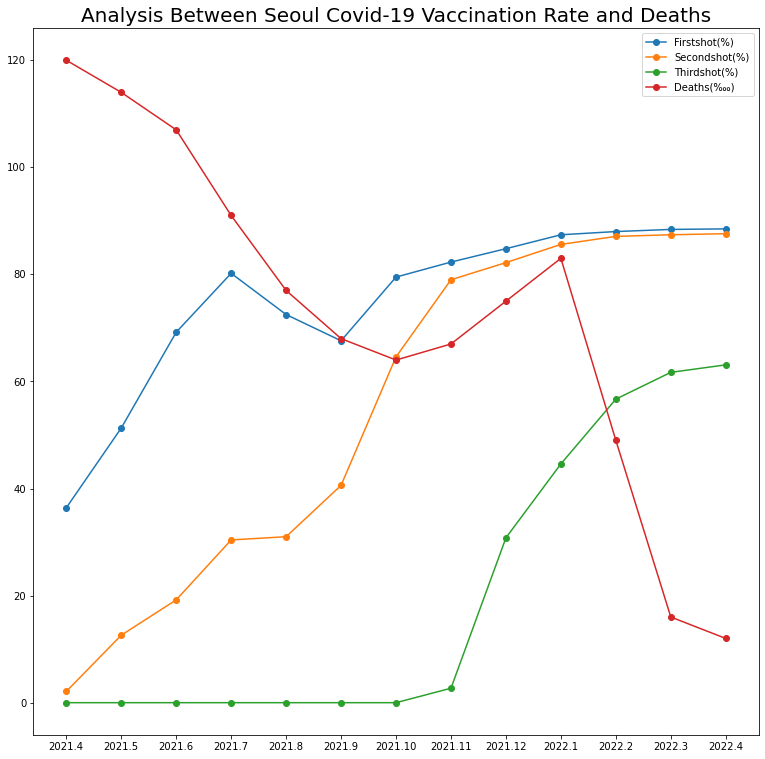

In [37]:
import matplotlib.pyplot as plt

a_df = df.query('name =="1차접종률(%)"')
a_value = a_df['value']
months = a_df['months']

b_df = df.query(('name =="2차접종률(%)"'))
b_value = b_df['value']

c_df = df.query(('name =="3차접종률(%)"'))
c_value = c_df['value']

d_df = df.query(('name =="서울시 사망자"'))
d_value = d_df['value']

fig = plt.figure(figsize=(13,13))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(months,a_value,marker='o',label='Firstshot(%)')
ax.plot(months,b_value,marker='o',label='Secondshot(%)')
ax.plot(months,c_value,marker='o',label='Thirdshot(%)')
ax.plot(months,d_value,marker='o',label='Deaths(‱)')

ax.legend()

plt.title('Analysis Between Seoul Covid-19 Vaccination Rate and Deaths', fontsize = 20)
plt.show()

# 6. 결론

## (1) 분석 결과

분석한 결과, 서울시 코로나 19 1차 백신 접종률은 2021년 4월부터 가파른 증가 추세를 보이다가, 2021년 8월 1차 접종 대상이 늘어나면서 접종률이 감소하는 추세를 보였습니다. 그 후로도 1차 접종률은 점진적 상승세로 2022년 4월 서울시 접종인구의 88.5% 가 접종을 마무리하였습니다.

서울시 코로나 19 2차 백신 접종률은 2021년 4월 2.1% 에 그쳤으나, 꾸준한 상승세를 타고 2022년 4월 87.6% 를 기록하며 1차 접종률과 거의 동등한 수치를 보였습니다.

서울시 코로나 19 3차 백신 접종률은 2021년 내내 1퍼센트에 미치지 못하는 수치를 보이다가 2021년 하반기부터 접종 속도가 빠르게 증가하며, 2022년 4월 63.1% 의 접종률을 보였습니다.

서울시의 코로나 19 확진자 대비 사망자 비율은, 2021년 4월 1.2% 였으나 백신 접종률이 증가함에 따라 점점 감소하였고, 2021년 10월부터 동절기로 접어들며 그 비율이 0.83% 까지 증가하였다가 현재까지도 꾸준한 감소세를 이어오고 있습니다.

2022년 4월 기준 사망률은 0.12%로, 이는 확진자 1000명 중 1명 정도의 수치이기 때문에 매우 낮다고 할 수 있습니다.

따라서 코로나 19 백신 접종이 확진자 수 증가 추이는 막지 못하였지만, 확진자 수 대비 사망자 수는 매우 감소시켰음을 알 수 있습니다.

최종 결과, '서울시 코로나 19 백신의 접종률이 높아질수록, 코로나 19로 인한 서울시 사망자 비율은 감소할 것이다' 라는 첫 가설은, 
성립한다고 결론지어집니다.

# 7. 참고문헌

1. 민형기, 파이썬으로 데이터 주무르기, 비제이퍼블릭(2017)
2. 평생 데이터 분석 하고픈 꽁냥이, '[선 그래프(Line graph)] 3. Matplotlib을 이용하여 여러 개 선 그래프 겹쳐 그리기', https://zephyrus1111.tistory.com/25